<a href="https://colab.research.google.com/github/lesleytmuzavazi-ui/Analyzing-Historical-Stock-Revenue-Data-and-Building-a-Dashboard/blob/main/TeslaAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello, Jupyter!")


Hello, Jupyter!


Question 1: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the tesla_data dataframe using the head function

In [ ]:
#Import required libraries
import yfinance as yf
import pandas as pd

#Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')

#Reset the index to make 'Date' a column
tesla_data.reset_index(inplace=True)

#Add a Ticker column (optional but useful for multi-stock analysis)
tesla_data['Ticker'] = 'TSLA'

#Save the data to a CSV file
tesla_data.to_csv('tesla_data.csv', index=False)

#Display the first five rows
print(tesla_data.head())


C:\Users\Farisa\AppData\Local\Temp\ipykernel_16476\1105134125.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

Price        Date      Close       High        Low       Open     Volume  \
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA   
0      2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500   
1      2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500   
2      2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000   
3      2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500   
4      2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500   

Price  Ticker  
Ticker         
0        TSLA  
1        TSLA  
2        TSLA  
3        TSLA  
4        TSLA  


 Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch Tesla revenue page from Macrotrends
URL = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
HEADERS = {
    "User-Agent": "Mozilla/5.0 (compatible; MyLearningBot/1.0; +https://example.com/contact)"
}

response = requests.get(URL, headers=HEADERS)
html = response.text

# Step 2: Parse HTML and extract the revenue table
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table", class_="historical_data_table table")

# Step 3: Extract rows and build dataframe
data = []
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        try:
            revenue_val = float(revenue)
            data.append({"date": pd.to_datetime(date), "revenue": revenue_val})
        except ValueError:
            continue

# Step 4: Store in DataFrame and sort
tesla_revenue = pd.DataFrame(data)
tesla_revenue = tesla_revenue.sort_values("date").reset_index(drop=True)

# Step 5: Display the last five rows
print(tesla_revenue.tail())


Question 3: Use yfinance to Extract Stock Data
Reset the index, save, and display the first five rows of the gme_data dataframe using the head function

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Define the ticker
ticker = "GME"

# Step 2: Download historical stock data (daily by default)
gme_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

# Step 3: Reset the index to make 'Date' a column instead of index
gme_data.reset_index(inplace=True)

# Step 4: Save to CSV
gme_data.to_csv("gme_data.csv", index=False)

# Step 5: Display the first five rows
print(gme_data.head())


C:\Users\Farisa\AppData\Local\Temp\ipykernel_16476\1714734996.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


Question 4: Use Webscraping to Extract GME Revenue Data
Display the last five rows of the gme_revenue dataframe using the tail function.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Define the URL and headers
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (compatible; MyLearningBot/1.0; +https://example.com/contact)"
}

# Step 2: Fetch the webpage
response = requests.get(url, headers=headers)
html = response.text

# Step 3: Parse HTML using BeautifulSoup
soup = BeautifulSoup(html, "html.parser")
table = soup.find("table", class_="historical_data_table table")

# Step 4: Extract data rows
data = []
for row in table.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        try:
            revenue_val = float(revenue)
            data.append({"date": pd.to_datetime(date), "revenue": revenue_val})
        except ValueError:
            continue

# Step 5: Create DataFrame and sort by date
gme_revenue = pd.DataFrame(data)
gme_revenue = gme_revenue.sort_values("date").reset_index(drop=True)

# Step 6: Display the last five rows
print(gme_revenue.tail())


         date  revenue
12 2021-01-01   5090.0
13 2022-01-01   6011.0
14 2023-01-01   5927.0
15 2024-01-01   5273.0
16 2025-01-01   3823.0


Question 5: Plot Tesla Stock Graph

C:\Users\Farisa\AppData\Local\Temp\ipykernel_16476\1117971593.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


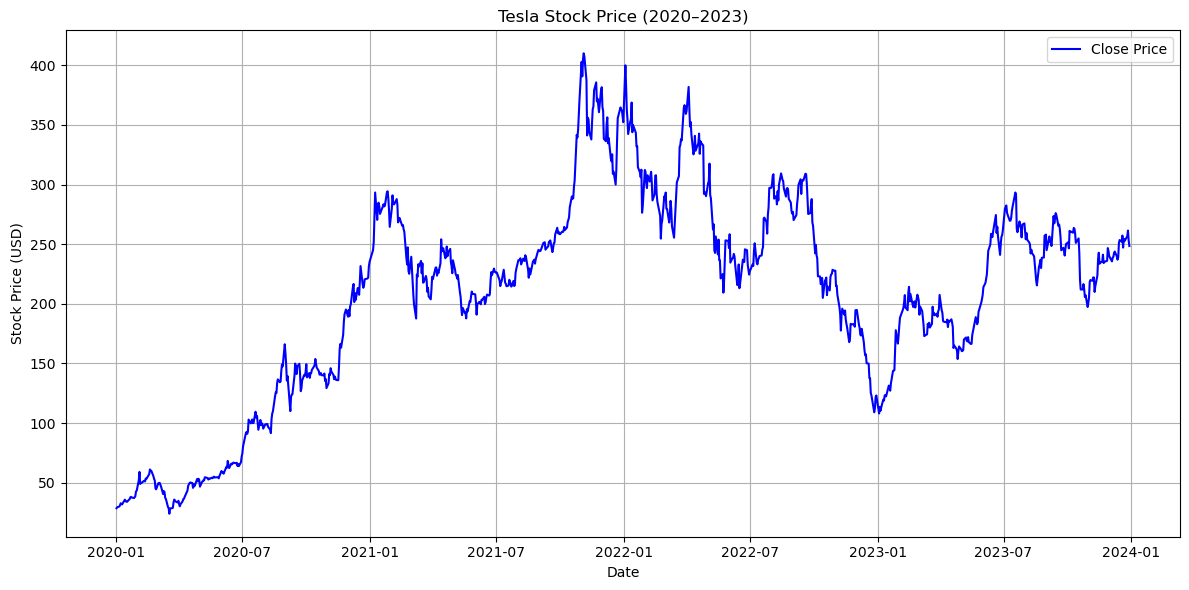

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)  # Make 'Date' a column

# Define the graphing function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the graph with a title
make_graph(tesla_data, "Tesla Stock Price (2020–2023)")


C:\Users\Farisa\AppData\Local\Temp\ipykernel_16476\889290466.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gme_data = yf.download('GME', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


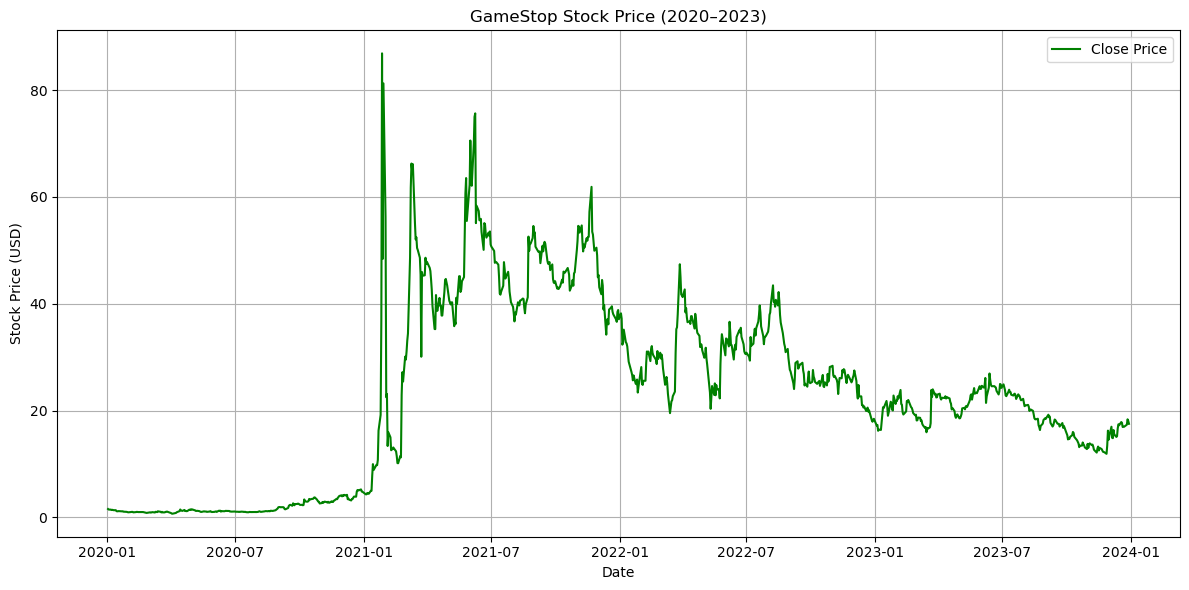

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Download GameStop stock data
gme_data = yf.download('GME', start='2020-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)  # Make 'Date' a column

# Define the graphing function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot the graph with a title
make_graph(gme_data, "GameStop Stock Price (2020–2023)")
